# Polynimial Regression

### Definition

**Polynomial regression** is a form of regression analysis in which the relationship between the independent variable \( x \) and the dependent variable \( y \) is modeled as an \( n \)th degree polynomial. Polynomial regression fits a nonlinear relationship between the value of \( x \) and the corresponding conditional mean of \( y \), denoted \( E(y |x) \).

### Formula:

The formula for a polynomial regression of degree \( n \) is:

$ y = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n + \epsilon $

Here's what each element in the formula represents:

- `y`: The dependent variable, or the output that we're trying to predict.
- `β0`: The intercept term, representing the predicted value of \( y \) when all independent variables are zero.
- `β1, β2, ..., βn`: The coefficients of the model which weight each corresponding term of the independent variable \( x \). Each coefficient represents the impact of a change in \( x \) to the respective power on the predicted output \( y \).
- `x`: The independent variable; however, unlike simple linear regression, it is raised to the power of \( 1, 2, ..., n \), allowing for a nonlinear relationship.
- `x^2, x^3, ..., x^n`: The successive powers of \( x \) which model the curvature of the polynomial relationship.
- `𝟄`: The error term or the residual, representing the portion of \( y \) not explained by the model, which includes all other factors affecting \( y \).

### Example

Consider predicting the amount of pollutants in a city based on the city's population size. The relationship may not be linear; perhaps pollution increases at a decreasing rate as population increases. In this case, a polynomial regression could model this nonlinear effect.

### Calculation

Polynomial regression coefficients are typically calculated using the Least Squares method, similar to linear regression. However, instead of fitting a straight line, polynomial regression fits a curve to the data. This is often implemented by transforming the original independent variables into polynomial terms and then using these transformed variables in a multiple linear regression model.

- `β1` would represent the linear effect of the independent variable on the dependent variable, similar to linear regression.
- `β2` would capture the quadratic effect, reflecting how the effect of the independent variable changes as its value increases.
- Higher-degree terms (`β3`, `βn`, etc.) represent more complex relationships and interactions between the independent variable and the dependent variable.


### Importing the dataset

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('./filez/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


### Training the Linear Regression Model on the whole dataset

In [80]:
# Using the whole dataset to leverage the maximum amount
# of data to train the model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

### Training the Polynomial Regression Model on the whole dataset

- When datasets are very small, a common practice is to use the entire dataset for training to maximize the amount of data the model can learn from. However, this means that we can't assess the model's performance on unseen data within this dataset.
- For such small datasets, cross-validation could be used to estimate the model's performance, where the dataset is split into several smaller train/test splits, and the model's performance is averaged across these splits.

In [81]:
from sklearn.preprocessing import PolynomialFeatures

# matrix of features with position levels (x) and squared of position levels (x^2)
poly_reg = PolynomialFeatures(degree=2) # n=2
X_poly = poly_reg.fit_transform(X)

print('X:','\n', X, '\n')
print('X_poly:', '\n', X_poly)

X: 
 [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] 

X_poly: 
 [[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


In [82]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y)


LinearRegression()

### Visualising the Linear Regression results

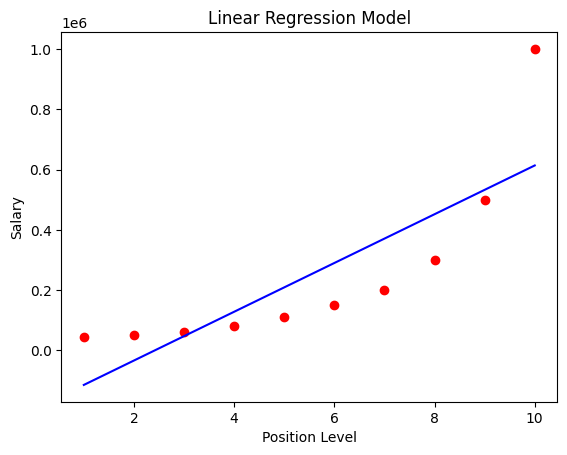

In [83]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Linear Regression Model')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

# red points -> real salaries
# blue line -> regression line with predictions

    Linear Regression doesn't seem the right model

### Visualising the Polynomial Regression results (n=2)

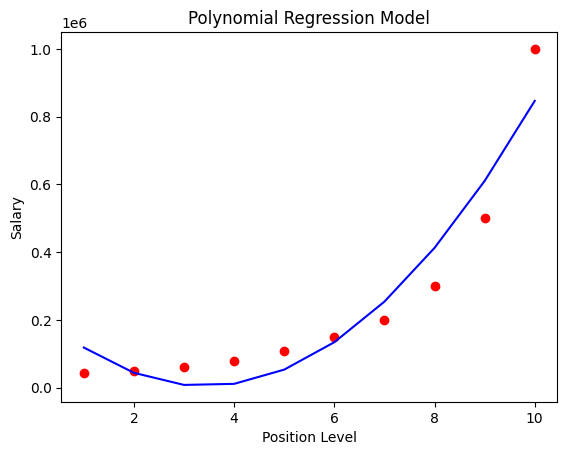

In [84]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg2.predict(X_poly), color='blue')
plt.title('Polynomial Regression Model')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Visualising the Polynomial Regression results (n=4)

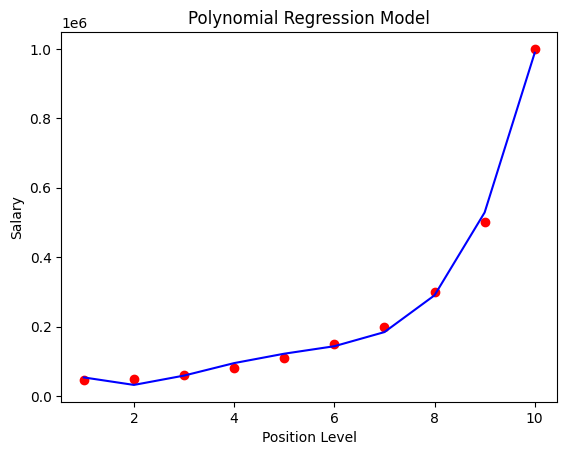

In [85]:
# polynomial regression model with n=4

poly_reg = PolynomialFeatures(degree=4) # n=2
X_poly = poly_reg.fit_transform(X)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y)

plt.scatter(X, y, color='red')
plt.plot(X, lin_reg2.predict(X_poly), color='blue')
plt.title('Polynomial Regression Model')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Visualising the Polynomial Regression results (for higher resolution & smoother curve)

/var/folders/1d/ty_knwmj61b4d3qs091tfglm0000gn/T/ipykernel_99770/2626024656.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


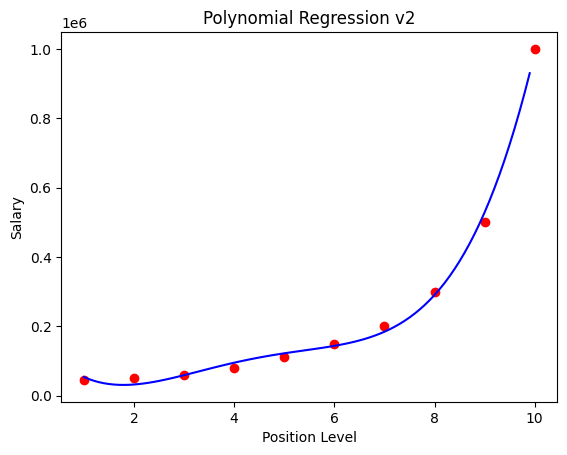

In [86]:
# increase the density of the X points with step = 0.1 -> (1.1, 1.2, 1.3....)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Polynomial Regression v2')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Predicting a new result with Linear Regression

In [87]:
print(
    f"new prediction with position 6.5 [linear regression]: {lin_reg.predict([[6.5]])[0]:,.2f}"
)

new prediction with position 6.5 [linear regression]: 330,378.79


    wrong prediction compared to actual salaries

### Predicting a new result with Polynomial Regression

In [95]:
pred = lin_reg2.predict(poly_reg.fit_transform([[6.5]]))
print(
    f"new prediction with position 6.5 [polynomial regression]: {pred[0]:,.2f}"
)

new prediction with position 6.5 [polynomial regression]: 158,862.45
